## Noise Reduction using SVD

### Source 
https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy.linalg as la
import cv2

#### Create white canvas and add noise to it

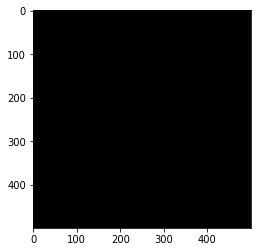

In [70]:
m, n = 500, 500
blank_img = np.ones(shape=(m, n), dtype=np.uint8)*255
plt.imshow(blank_img, cmap="gray")

##### Adding Noise

In [71]:
noise = np.random.normal(size=(m, n))

In [72]:
blank_img[noise > 0] = 100

In [73]:
blank_canvas = np.asarray([blank_img, blank_img, blank_img], dtype=np.uint8)

In [74]:
blank_canvas = blank_canvas.reshape(500, 500, 3)

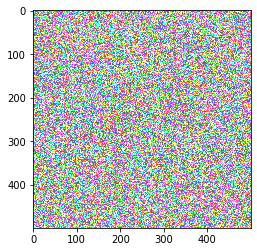

In [75]:
plt.imshow(blank_canvas)

##### Save the Noise Canvas

In [76]:
pil_img = Image.fromarray(blank_canvas)

In [77]:
pil_img.save("images/noise_canvas.jpg", )

##### Load The Noise Canvas as Grayscale

In [78]:
noise_img = cv2.imread("images/noise_canvas.jpg", cv2.IMREAD_GRAYSCALE)

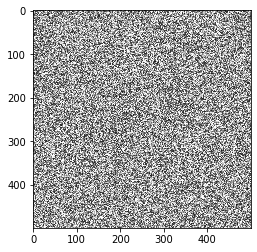

In [79]:
plt.imshow(noise_img, cmap='gray')

### SVD The Noise Canvas

In [88]:
U, s, VT = la.svd(noise_img)

In [89]:
Sigma = np.zeros((m, n))

In [90]:
n_singular_values = len(s)

Sigma[:n_singular_values, :n_singular_values] = np.diag(s)

In [94]:
print(U.shape)
print(Sigma.shape)
print(VT.shape)

(500, 500)
(500, 500)
(500, 500)


#### Approximating the Image using first K singular Values

In [95]:
k = 10
u_approx = U[:, :k]
sigma_approx = Sigma[:k, :k]
vt_approx = VT[:k, :]
uxsigma = np.matmul(u_approx, sigma_approx)
mat_approx = np.matmul(uxsigma, vt_approx)

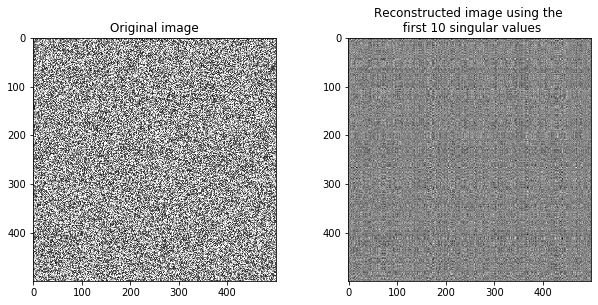

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1 = axes[0]
ax2 = axes[1]

ax1.imshow(noise_img, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title("Reconstructed image using the \n first {} singular values".format(k))
plt.show()

The Noise is represented by the last singular values, hence approximating the image using only the first components of the matrix along the removes the noise

#### References

https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d